Team: ENARC

This classification solution was written by Alex Osypov, Brian To, and Kyu Shim for the TAMU Datathon ConocoPhillips "Predictive Equipment Failures" Challenge.

In [35]:
import pandas as pd
import numpy as np

# these are our test and train dataframes
test_df = pd.read_csv('/kaggle/input/equipfails/equip_failures_test_set.csv')
train_df = pd.read_csv('/kaggle/input/equipfails/equip_failures_training_set.csv')

col = train_df.columns
col_test = test_df.columns

We use an imputer to help replace the 'na' values with the median of the column. There are several other methods to impute data, but we decided that filling unknown values with the median/mean of the column will produce the best results. 

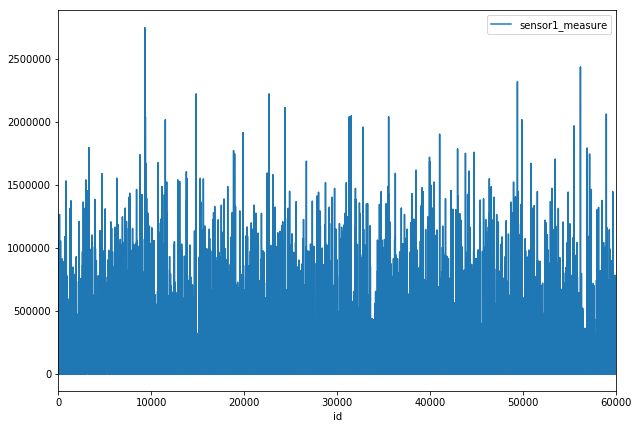

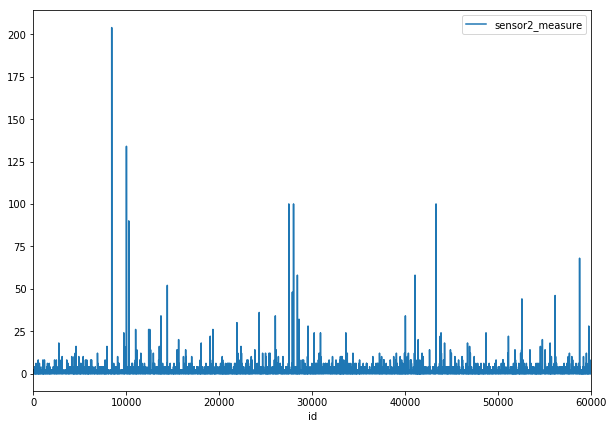

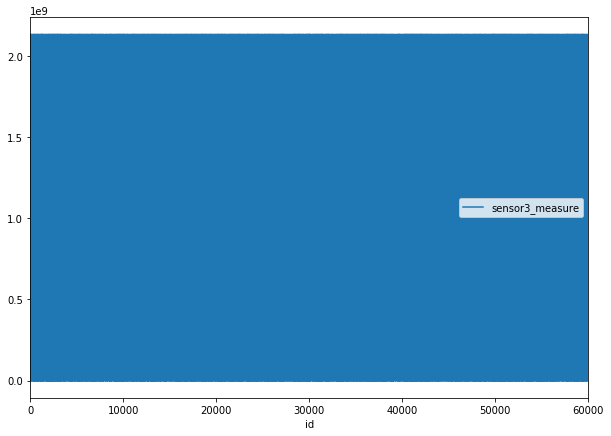

In [36]:
# https://machinelearningmastery.com/handle-missing-data-python/
from sklearn.impute import SimpleImputer

# we reform the 'na' entries in the input csv into np.nan for compliance with the sklearn imputer
train_df = train_df.replace('na', np.nan)  # NoNaN :(
# This uses the median strategy for imputation
imp_mean = SimpleImputer(strategy='median')

# Run the imputer on the training data to replace values
imp_mean.fit(train_df)
imputed_train_df = imp_mean.transform(train_df)
imputed_train_df = pd.DataFrame(imputed_train_df, columns=col)

# Display the first 3 feature columns and their distributions
imputed_train_df.plot(x ='id', y='sensor1_measure', kind = 'line', figsize=(10,7))
imputed_train_df.plot(x ='id', y='sensor2_measure', kind = 'line', figsize=(10,7))
imputed_train_df.plot(x ='id', y='sensor3_measure', kind = 'line', figsize=(10,7))
    
# Handling the test data
# we reform the 'na' entries in the input csv into np.nan for compliance with the sklearn imputer
test_df = test_df.replace('na', np.nan)
# This uses the median strategy for imputation
imp_mean_test = SimpleImputer(strategy='median')

# Run the imputer on the test data to replace values
imp_mean_test.fit(test_df)
imputed_test_df = imp_mean_test.transform(test_df)
imputed_test_df = pd.DataFrame(imputed_test_df, columns=col_test) 

We use an imputer to help replace the 'na' values with the mean of the column. There are several other methods to impute data, but we decided that filling unknown values with the median/mean of the column will produce the best results.

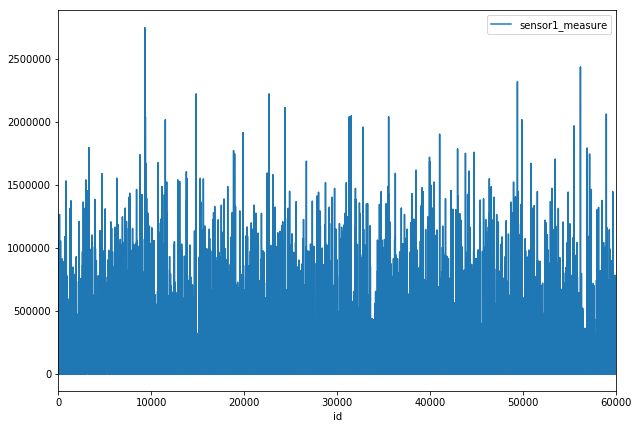

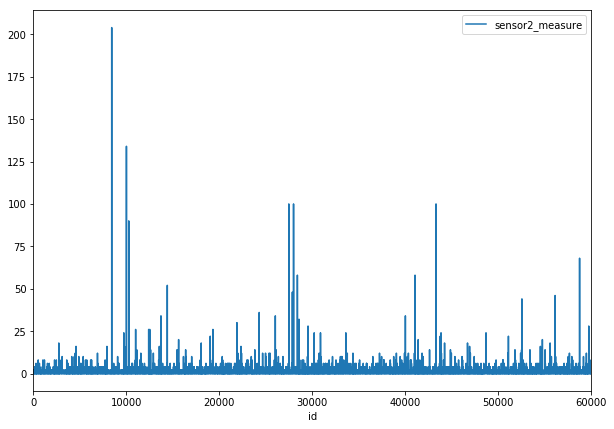

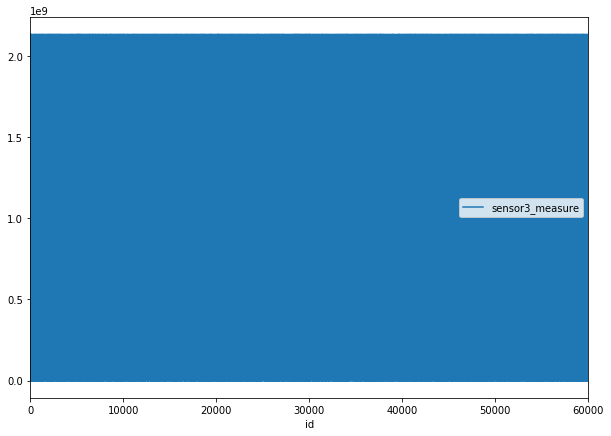

In [37]:
# https://machinelearningmastery.com/handle-missing-data-python/
from sklearn.impute import SimpleImputer

# we reform the 'na' entries in the input csv into np.nan for compliance with the sklearn imputer
train_df = train_df.replace('na', np.nan)  # NoNaN :(
# This uses the mean strategy for imputation
imp_mean = SimpleImputer(strategy='mean')

# Run the imputer on the training data to replace values
imp_mean.fit(train_df)
imputed_train_df = imp_mean.transform(train_df)
imputed_train_df = pd.DataFrame(imputed_train_df, columns=col)

# Display the first 3 feature columns and their distributions
imputed_train_df.plot(x ='id', y='sensor1_measure', kind = 'line', figsize=(10,7))
imputed_train_df.plot(x ='id', y='sensor2_measure', kind = 'line', figsize=(10,7))
imputed_train_df.plot(x ='id', y='sensor3_measure', kind = 'line', figsize=(10,7))
    
    

# Handling the test data
# we reform the 'na' entries in the input csv into np.nan for compliance with the sklearn imputer
test_df = test_df.replace('na', np.nan)
# This uses the mean strategy for imputation
imp_mean_test = SimpleImputer(strategy='mean')

# Run the imputer on the test data to replace values
imp_mean_test.fit(test_df)
imputed_test_df = imp_mean_test.transform(test_df)
imputed_test_df = pd.DataFrame(imputed_test_df, columns=col_test) 

This is the fun part! We execute the XGBoost learning algorithm on the training dataset, then attempt to classify the test dataset based on what XGBoost learned from the training data. XGBoost stands for Extreme Gradient Boosting, an ensemble method that performs boosting to achieve a lower variance on the dataset. XGBoost was chosen for its ability to calculate strong classifiers even if many datapoints have missing parts or are missing entirely. It essentially handles "noisy" well compared to other ensemble methods. 

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[0]	eval-aucpr:0.705887	eval-map:0.712588	eval-rmse:0.381294	train-aucpr:0.862884	train-map:0.863214	train-rmse:0.380243
[1]	eval-aucpr:0.77019	eval-map:0.770221	eval-rmse:0.296053	train-aucpr:0.917868	train-map:0.917836	train-rmse:0.293619
[2]	eval-aucpr:0.798512	eval-map:0.798578	eval-rmse:0.233185	train-aucpr:0.929316	train-map:0.929296	train-rmse:0.229239
[3]	eval-aucpr:0.821739	eval-map:0.821707	eval-rmse:0.18642	train-aucpr:0.938245	train-map:0.938092	train-rmse:0.180469
[4]	eval-aucpr:0.828913	eval-map:0.828866	eval-rmse:0.151983	train-aucpr:0.944692	train-map:0.94471	train-rmse:0.14351
[5]	eval-aucpr:0.838096	eval-map:0.838114	eval-rmse:0.126669	train-aucpr:0.946835	train-map:0.946861	train-rmse:0.11559
[6]	eval-aucpr:0.843913	eval-map:0.84406	eval-rmse:0.10844	train-aucpr:0.953535	train-map:0.953862	train-rmse:0.094487
[7]	eval-aucpr:0.846658	eval-map:0.846864	eval-rmse:0.095974	train-aucpr:0.960226	train-map:0.960492	train-rmse:0.078495
[8]	eval-aucpr:0.850176	eval-map:0.8503

[68]	eval-aucpr:0.891524	eval-map:0.891597	eval-rmse:0.067119	train-aucpr:1	train-map:1	train-rmse:0.008799
[69]	eval-aucpr:0.891757	eval-map:0.891831	eval-rmse:0.067103	train-aucpr:1	train-map:1	train-rmse:0.008649
[70]	eval-aucpr:0.891802	eval-map:0.891875	eval-rmse:0.067113	train-aucpr:1	train-map:1	train-rmse:0.008535
[71]	eval-aucpr:0.89198	eval-map:0.892053	eval-rmse:0.067116	train-aucpr:1	train-map:1	train-rmse:0.008436
[72]	eval-aucpr:0.892287	eval-map:0.89236	eval-rmse:0.067075	train-aucpr:1	train-map:1	train-rmse:0.008354
[73]	eval-aucpr:0.892347	eval-map:0.892421	eval-rmse:0.067101	train-aucpr:1	train-map:1	train-rmse:0.008256
[74]	eval-aucpr:0.891921	eval-map:0.891994	eval-rmse:0.067207	train-aucpr:1	train-map:1	train-rmse:0.008163
[75]	eval-aucpr:0.892078	eval-map:0.892151	eval-rmse:0.067136	train-aucpr:1	train-map:1	train-rmse:0.008105
[76]	eval-aucpr:0.892491	eval-map:0.892564	eval-rmse:0.06706	train-aucpr:1	train-map:1	train-rmse:0.00804
[77]	eval-aucpr:0.892902	eval-ma

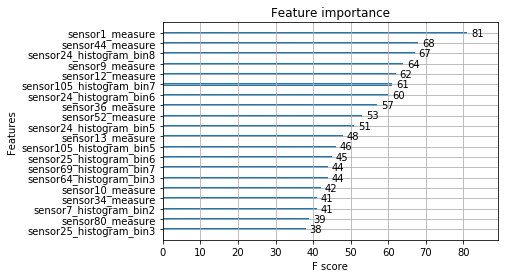

In [38]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

trainSet, validationSet = train_test_split(imputed_train_df, test_size=0.5)

dtrain = xgb.DMatrix(trainSet.iloc[:, 2:], label=trainSet['target'])
dtest = xgb.DMatrix(validationSet.iloc[:, 2:], label=validationSet['target'])
true_test = xgb.DMatrix(imputed_test_df.iloc[:, 1:])

# Binary:logistic is the objective function chosen for its output classifications with values [0,1]
param = {'max_depth':7, 'eta':0.25, 'verbosity':0, 'objective':'binary:logistic', 'alpha':0.5}
param['nthread'] = 6
param['eval_metric'] = ['aucpr', 'map', 'rmse']
num_rounds = 100
evallist = [(dtest, 'eval'), (dtrain, 'train')]

# train the data given these set of parameters
model = xgb.train(param, dtrain, num_rounds, evallist)
prediction = model.predict(true_test)

print("Mean of predictions: " + str(np.mean(prediction)))
print("Median of predicitons: " + str(np.median(prediction)))

# visualize the feature importance
xgb.plot_importance(model, max_num_features=20)
xgb.to_graphviz(model)

# XGB returns a probability rather than binary 1/0, so we will perform a split on 0.5
for count in range(len(prediction)):
    if(prediction[count] > .5):
      prediction[count] = 1
    else:
      prediction[count] = 0

[0]	eval-aucpr:0.724007	eval-map:0.72186	eval-rmse:0.404227	train-aucpr:0.847504	train-map:0.849859	train-rmse:0.403695
[1]	eval-aucpr:0.767089	eval-map:0.770042	eval-rmse:0.330186	train-aucpr:0.883084	train-map:0.884609	train-rmse:0.32895
[2]	eval-aucpr:0.780681	eval-map:0.779523	eval-rmse:0.271824	train-aucpr:0.903731	train-map:0.903744	train-rmse:0.26976
[3]	eval-aucpr:0.792649	eval-map:0.792037	eval-rmse:0.225659	train-aucpr:0.912358	train-map:0.911871	train-rmse:0.22253
[4]	eval-aucpr:0.807114	eval-map:0.80624	eval-rmse:0.189114	train-aucpr:0.921774	train-map:0.921328	train-rmse:0.184703
[5]	eval-aucpr:0.819513	eval-map:0.819009	eval-rmse:0.16028	train-aucpr:0.935788	train-map:0.935583	train-rmse:0.154297
[6]	eval-aucpr:0.830017	eval-map:0.829771	eval-rmse:0.137569	train-aucpr:0.944942	train-map:0.944224	train-rmse:0.129787
[7]	eval-aucpr:0.83657	eval-map:0.836448	eval-rmse:0.120079	train-aucpr:0.948069	train-map:0.947411	train-rmse:0.110563
[8]	eval-aucpr:0.840894	eval-map:0.8407

[69]	eval-aucpr:0.879131	eval-map:0.879232	eval-rmse:0.068121	train-aucpr:1	train-map:1	train-rmse:0.010636
[70]	eval-aucpr:0.879572	eval-map:0.879672	eval-rmse:0.068069	train-aucpr:1	train-map:1	train-rmse:0.010386
[71]	eval-aucpr:0.879619	eval-map:0.87972	eval-rmse:0.068022	train-aucpr:1	train-map:1	train-rmse:0.010081
[72]	eval-aucpr:0.880116	eval-map:0.880215	eval-rmse:0.067908	train-aucpr:1	train-map:1	train-rmse:0.009867
[73]	eval-aucpr:0.880394	eval-map:0.880493	eval-rmse:0.067851	train-aucpr:1	train-map:1	train-rmse:0.009641
[74]	eval-aucpr:0.880946	eval-map:0.881044	eval-rmse:0.067781	train-aucpr:1	train-map:1	train-rmse:0.009472
[75]	eval-aucpr:0.881114	eval-map:0.881212	eval-rmse:0.067796	train-aucpr:1	train-map:1	train-rmse:0.009271
[76]	eval-aucpr:0.880794	eval-map:0.880893	eval-rmse:0.067874	train-aucpr:1	train-map:1	train-rmse:0.009117
[77]	eval-aucpr:0.880867	eval-map:0.880966	eval-rmse:0.067909	train-aucpr:1	train-map:1	train-rmse:0.008941
[78]	eval-aucpr:0.880585	eval

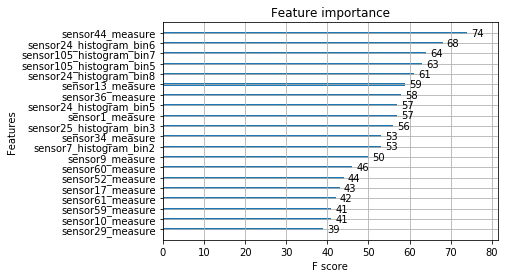

In [39]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

trainSet, validationSet = train_test_split(imputed_train_df, test_size=0.5)

dtrain = xgb.DMatrix(trainSet.iloc[:, 2:], label=trainSet['target'])
dtest = xgb.DMatrix(validationSet.iloc[:, 2:], label=validationSet['target'])
true_test = xgb.DMatrix(imputed_test_df.iloc[:, 1:])

# Binary:logistic is the objective function chosen for its output classifications with values [0,1]
param = {'max_depth':7, 'eta':0.2, 'verbosity':1, 'objective':'binary:logistic', 'alpha':0.5}
param['nthread'] = 6
param['eval_metric'] = ['aucpr', 'map', 'rmse']
num_rounds = 100
evallist = [(dtest, 'eval'), (dtrain, 'train')]

model = xgb.train(param, dtrain, num_rounds, evallist)
prediction = model.predict(true_test)

print("Mean of predictions: " + str(np.mean(prediction)))
print("Median of predicitons: " + str(np.median(prediction)))
# print("FSCORE: " + str(model.get_fscore()))
xgb.plot_importance(model, max_num_features=20)
xgb.to_graphviz(model)

# XGB returns a probability rather than binary 1/0, so we will perform a split on 0.5
for count in range(len(prediction)):
    if(prediction[count] >= 0.5):
      prediction[count] = 1
    else:
      prediction[count] = 0

Finally! The model is trained on the training data and has produced predictions on the test data. We reformat the predictions list into a more suitable pandas DataFrame for easy output into an output.csv. We also save the trained model as a .model file where it can be loaded back into this program or other programs that may require this trained classifier for new data that needs a classification later down the line. 

In [40]:
count = 1
temp = [] # to help reform the 1D predictions list into a pandas dataframe
for item in prediction:
  temp.append([count, int(item)])
  count+=1

predictions_df = pd.DataFrame(temp, columns=['id','target'])

In [41]:
# Create & upload a file.
predictions_df.to_csv('output.csv', index=False, header=True)
print(predictions_df) # display the final DataFrame
model.save_model('0001.model')

          id  target
0          1       0
1          2       0
2          3       0
3          4       0
4          5       0
...      ...     ...
15996  15997       0
15997  15998       0
15998  15999       0
15999  16000       0
16000  16001       0

[16001 rows x 2 columns]
